## importing packages and Reading the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import matplotlib as mpl
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
from collections import Counter
import wordcloud
USvideos = pd.read_csv("USvideos.csv")
USvideos.head(2)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...

##  information about the data

In [2]:
USvideos.shape

(40949, 16)

the dataset contains 40949 rows and 16 columns.

In [3]:
USvideos.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [4]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


We can see that all columns in the dataset are complete (i.e. they have 40,949 non-null entries) except description column which has some null values; it only has 40,379 non-null values.

In [5]:
#The number of unique videos in the table
USvideos['video_id'].unique().shape[0]

6351

## Data cleaning

In [6]:
# The description column has some null values and the null value are denoted by NaN,so we need to clean the data.
USvideos["description"] =USvideos["description"].fillna(value="")

## Processing the dates

In [7]:
#Transforming Trending date and publish time columns to datetime format 
USvideos['trending_date'] = pd.to_datetime(USvideos['trending_date'], errors='coerce',format='%y.%d.%m')
USvideos['publish_time'] = pd.to_datetime(USvideos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [8]:
USvideos.head(2)

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...

In [9]:
# separates date and time into two columns from 'publish_time' column and find the publish hour
USvideos.insert(4, 'publish_date', USvideos['publish_time'].dt.date)
USvideos['publish_time'] = USvideos['publish_time'].dt.time
USvideos['publish_hour'] =pd.to_datetime(USvideos['publish_time'], format='%H:%M:%S').dt.hour
USvideos[['publish_date', 'publish_time','publish_hour']].head()

publish_date publish_time  publish_hour
0   2017-11-13     17:13:01            17
1   2017-11-13     07:30:00             7
2   2017-11-12     19:05:24            19
3   2017-11-13     11:00:04            11
4   2017-11-12     18:01:41            18

In [10]:
# statistical information about the numerical columns
USvideos.describe()

category_id         views         likes      dislikes  comment_count  \
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03   
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04   
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00   
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02   
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03   
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03   
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06   

       publish_hour  
count  40949.000000  
mean      13.766685  
std        6.424996  
min        0.000000  
25%       10.000000  
50%       15.000000  
75%       18.000000  
max       23.000000

## Assignment of the video category

In [11]:
USvideos['category_name'] = np.nan

USvideos.loc[(USvideos["category_id"] == 1),"category_name"] = 'Film and Animation'
USvideos.loc[(USvideos["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
USvideos.loc[(USvideos["category_id"] == 10),"category_name"] = 'Music'
USvideos.loc[(USvideos["category_id"] == 15),"category_name"] = 'Pets and Animals'
USvideos.loc[(USvideos["category_id"] == 17),"category_name"] = 'Sport'
USvideos.loc[(USvideos["category_id"] == 19),"category_name"] = 'Travel and Events'
USvideos.loc[(USvideos["category_id"] == 20),"category_name"] = 'Gaming'
USvideos.loc[(USvideos["category_id"] == 22),"category_name"] = 'People and Blogs'
USvideos.loc[(USvideos["category_id"] == 23),"category_name"] = 'Comedy'
USvideos.loc[(USvideos["category_id"] == 24),"category_name"] = 'Entertainment'
USvideos.loc[(USvideos["category_id"] == 25),"category_name"] = 'News and Politics'
USvideos.loc[(USvideos["category_id"] == 26),"category_name"] = 'How to and Style'
USvideos.loc[(USvideos["category_id"] == 27),"category_name"] = 'Education'
USvideos.loc[(USvideos["category_id"] == 28),"category_name"] = 'Science and Technology'
USvideos.loc[(USvideos["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
USvideos.loc[(USvideos["category_id"] == 25),"category_name"] = 'News & Politics'

In [12]:
USvideos['category_name'].value_counts()

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64

## Views, likes, dislikes and comment counts distribuition

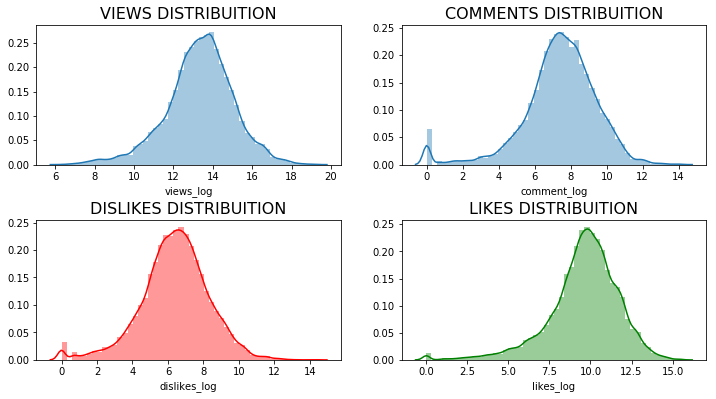

In [13]:
USvideos['likes_log'] = np.log(USvideos['likes'] + 1)
USvideos['views_log'] = np.log(USvideos['views'] + 1)
USvideos['dislikes_log'] = np.log(USvideos['dislikes'] + 1)
USvideos['comment_log'] = np.log(USvideos['comment_count'] + 1)
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(USvideos['views_log'])
g1.set_title("VIEWS DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(USvideos['likes_log'],color='green')
g2.set_title('LIKES DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(USvideos['dislikes_log'], color='r')
g3.set_title("DISLIKES DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(USvideos['comment_log'])
g4.set_title("COMMENTS DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

In [14]:
USvideos.describe()

category_id         views         likes      dislikes  comment_count  \
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03   
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04   
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00   
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02   
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03   
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03   
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06   

       publish_hour     likes_log     views_log  dislikes_log   comment_log  
count  40949.000000  40949.000000  40949.000000  40949.000000  40949.000000  
mean      13.766685      9.599392     13.337995      6.387610      7.387712  
std        6.424996      2.115725      1.709989      1.915583      2.057100  
min        0.000000      0.000000      6.309918      0.000000      0.000000  
25%       10.000000      8.598773     12.398056      5.313206      6.421622  
50%       15.000000      9.803225     13.432583      6.448889      7.526718  
75%       18.000000     10.922660     14.416081      7.569928      8.657998  
max       23.000000     15.540743     19.232552     14.330978     14.124157

## Views distribuition by category name's

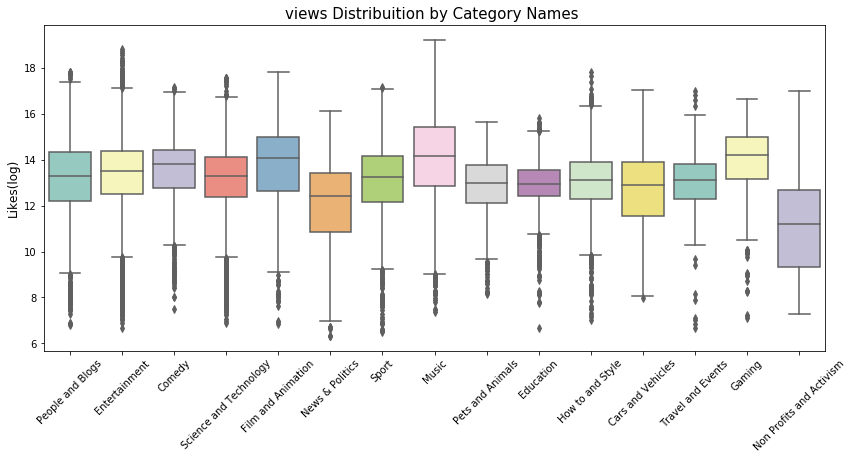

In [15]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='views_log', data=USvideos, palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("views Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

## likes distribuition by category name's

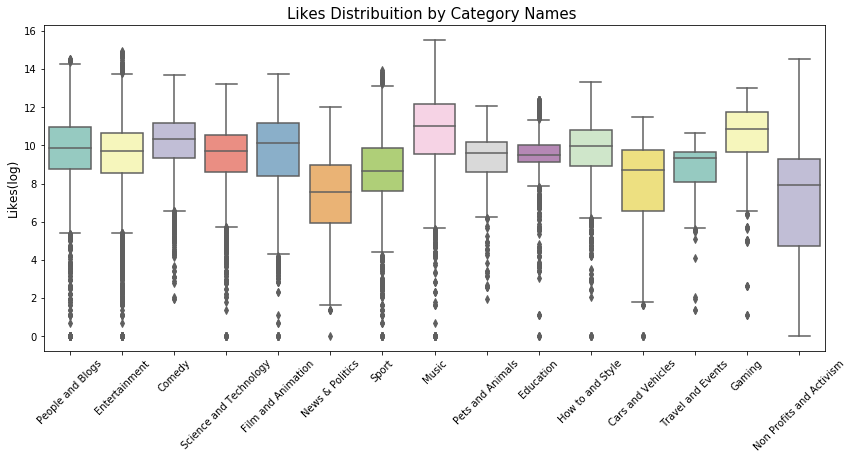

In [16]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=USvideos, palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

## dislikes distribuition by category name's

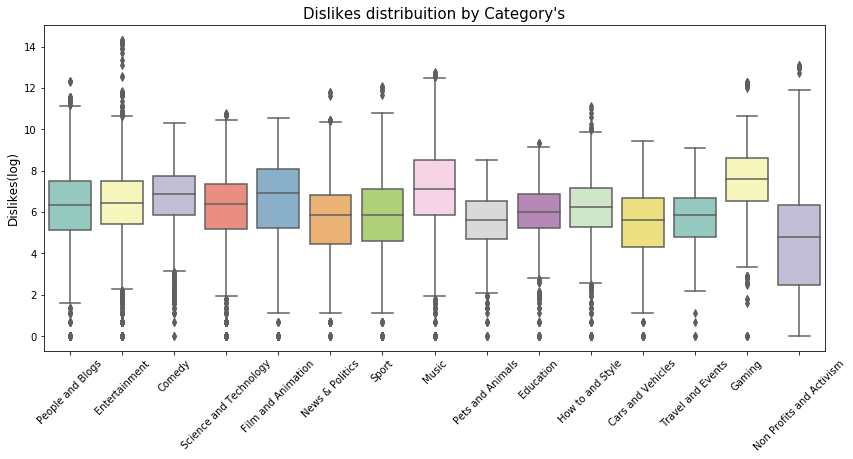

In [17]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=USvideos, palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

## comments count distribuition by category name's

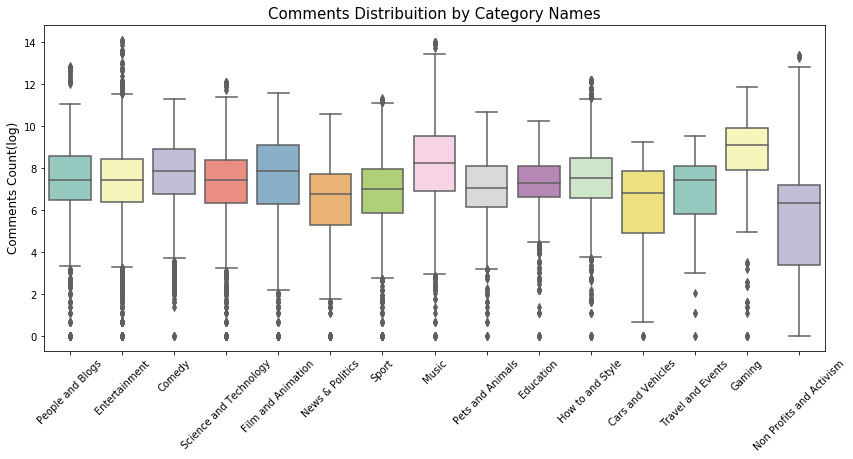

In [18]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=USvideos, palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

## Maximum (view,like, dislike, comments) count of a trending video

In [19]:
# trending video with max view count
USvideos[USvideos['views'] == USvideos['views'].max()].transpose()

38547
video_id                                                      VYOjWnS4cMY
trending_date                                         2018-06-02 00:00:00
title                   Childish Gambino - This Is America (Official V...
channel_title                                         ChildishGambinoVEVO
publish_date                                                   2018-05-06
category_id                                                            10
publish_time                                                     04:00:07
tags                    Childish Gambino|"Rap"|"This Is America"|"mcDJ...
views                                                           225211923
likes                                                             5023450
dislikes                                                           343541
comment_count                                                      517232
thumbnail_link             https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg
comments_disabled                                                   False
ratings_disabled                                                    False
video_error_or_removed                                              False
description             “This is America” by Childish Gambino http://s...
publish_hour                                                            4
category_name                                                       Music
likes_log                                                         15.4296
views_log                                                         19.2326
dislikes_log                                                      12.7471
comment_log                                                       13.1562

In [20]:
# trending video with max like count
USvideos[USvideos['likes'] == USvideos['likes'].max()].transpose()

38273
video_id                                                      7C2z4GqqS5E
trending_date                                         2018-06-01 00:00:00
title                                 BTS (방탄소년단) 'FAKE LOVE' Official MV
channel_title                                                     ibighit
publish_date                                                   2018-05-18
category_id                                                            10
publish_time                                                     09:00:02
tags                    BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...
views                                                           123010920
likes                                                             5613827
dislikes                                                           206892
comment_count                                                     1228655
thumbnail_link             https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg
comments_disabled                                                   False
ratings_disabled                                                    False
video_error_or_removed                                              False
description             BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
publish_hour                                                            9
category_name                                                       Music
likes_log                                                         15.5407
views_log                                                         18.6278
dislikes_log                                                        12.24
comment_log                                                       14.0214

In [21]:
# trending video with max dislike count
USvideos[USvideos['dislikes'] == USvideos['dislikes'].max()].transpose()

11323
video_id                                                      QwZT7T-TXT0
trending_date                                         2018-01-09 00:00:00
title                                                           So Sorry.
channel_title                                            Logan Paul Vlogs
publish_date                                                   2018-01-02
category_id                                                            24
publish_time                                                     16:42:21
tags                    logan paul vlog|"logan paul"|"logan"|"paul"|"o...
views                                                            37539570
likes                                                             1402578
dislikes                                                          1674420
comment_count                                                     1361580
thumbnail_link             https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg
comments_disabled                                                   False
ratings_disabled                                                    False
video_error_or_removed                                              False
description                                                              
publish_hour                                                           16
category_name                                               Entertainment
likes_log                                                         14.1538
views_log                                                         17.4409
dislikes_log                                                       14.331
comment_log                                                       14.1242

In [22]:
# trending video with max comment count
USvideos[USvideos['comment_count'] == USvideos['comment_count'].max()].transpose()

11323
video_id                                                      QwZT7T-TXT0
trending_date                                         2018-01-09 00:00:00
title                                                           So Sorry.
channel_title                                            Logan Paul Vlogs
publish_date                                                   2018-01-02
category_id                                                            24
publish_time                                                     16:42:21
tags                    logan paul vlog|"logan paul"|"logan"|"paul"|"o...
views                                                            37539570
likes                                                             1402578
dislikes                                                          1674420
comment_count                                                     1361580
thumbnail_link             https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg
comments_disabled                                                   False
ratings_disabled                                                    False
video_error_or_removed                                              False
description                                                              
publish_hour                                                           16
category_name                                               Entertainment
likes_log                                                         14.1538
views_log                                                         17.4409
dislikes_log                                                       14.331
comment_log                                                       14.1242

## Observation:

## Trending videos with most views

In [23]:
#Trending videos with most views
USvideos_Views=USvideos.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])
USvideos_Views.head(3)

video_id trending_date  \
38547  VYOjWnS4cMY    2018-06-02   
6181   FlsCjmMhFmw    2017-12-14   
34708  ffxKSjUwKdU    2018-05-14   

                                                   title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
34708               Ariana Grande - No Tears Left To Cry     ArianaGrandeVevo   

      publish_date  category_id publish_time  \
38547   2018-05-06           10     04:00:07   
6181    2017-12-06           24     17:58:51   
34708   2018-04-20           10     04:00:03   

                                                    tags      views    likes  \
38547  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  225211923  5023450   
6181   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  149376127  3093544   
34708  Ariana|"Grande"|"No"|"Tears"|"Left"|"To"|"Cry"...  148689896  3094021   

       ...  comments_disabled  ratings_disabled video_error_or_removed  \
38547  ...              False             False                  False   
6181   ...              False             False                  False   
34708  ...              False             False                  False   

                                             description  publish_hour  \
38547  “This is America” by Childish Gambino http://s...             4   
6181   YouTube Rewind 2017. Celebrating the videos, p...            17   
34708  No Tears Left To Cry (Official Video)Song Avai...             4   

       category_name  likes_log  views_log dislikes_log  comment_log  
38547          Music  15.429628  19.232552    12.747065    13.156249  
6181   Entertainment  14.944828  18.821978    14.312071    13.605652  
34708          Music  14.944982  18.817373    11.771459    12.396858  

[3 rows x 23 columns]

In [24]:
#Trending videos with least views
USvideos_Viewsl=USvideos.sort_values(by='views', ascending=True).drop_duplicates(subset=['video_id'])
USvideos_Viewsl.head()

video_id trending_date  \
14335  y6KYFcta4SE    2018-01-26   
14531  dQMZLXaa1L8    2018-01-27   
546    -JVITToppE0    2017-11-16   
12716  zeQaJGkFyqQ    2018-01-18   
160    qg0GdM60syI    2017-11-14   

                                                  title     channel_title  \
14335  1 dead, others injured after Ky. school shooting             Newsy   
14531                                     Artwork Forge  Palo Alto Online   
546       Coach Taggart Monday Presser Ahead of Arizona     GoDucksdotcom   
12716    Raw: 3 South Carolina Deputies, 1 Officer Shot  Associated Press   
160              Huffy Metaloid Bicycle Commercial 1997   90s Commercials   

      publish_date  category_id publish_time  \
14335   2018-01-23           25     15:30:01   
14531   2018-01-10           17     23:53:56   
546     2017-11-13           17     20:41:45   
12716   2018-01-16           25     12:16:44   
160     2017-03-31           27     21:46:53   

                                                    tags  views  likes  ...  \
14335  shooting|"kentucky"|"breaking news"|"u.s. news...    549      9  ...   
14531                                             [none]    658      1  ...   
546    Oregon|"Ducks"|"college athletics"|"college fo...    687     10  ...   
12716  news|"associated press"|"ap"|"ap online"|"asso...    748      9  ...   
160                              90s commercials|"Huffy"    773      2  ...   

       comments_disabled  ratings_disabled video_error_or_removed  \
14335              False             False                  False   
14531              False             False                  False   
546                False             False                  False   
12716               True             False                  False   
160                False             False                  False   

                                             description  publish_hour  \
14335  Kentucky Gov. Matt Bevin confirmed there was a...            15   
14531  Artwork Forge II - an art installation created...            23   
546    Coach Taggart addresses the media ahead of the...            20   
12716  Three deputies and one police officer were sho...            12   
160                            Anyone have one of those?            21   

         category_name likes_log  views_log dislikes_log  comment_log  
14335  News & Politics  2.302585   6.309918     0.000000     1.791759  
14531            Sport  0.693147   6.490724     0.000000     0.000000  
546              Sport  2.397895   6.533789     1.098612     1.791759  
12716  News & Politics  2.302585   6.618739     0.000000     0.000000  
160          Education  1.098612   6.651572     0.000000     0.000000  

[5 rows x 23 columns]

## views distribution

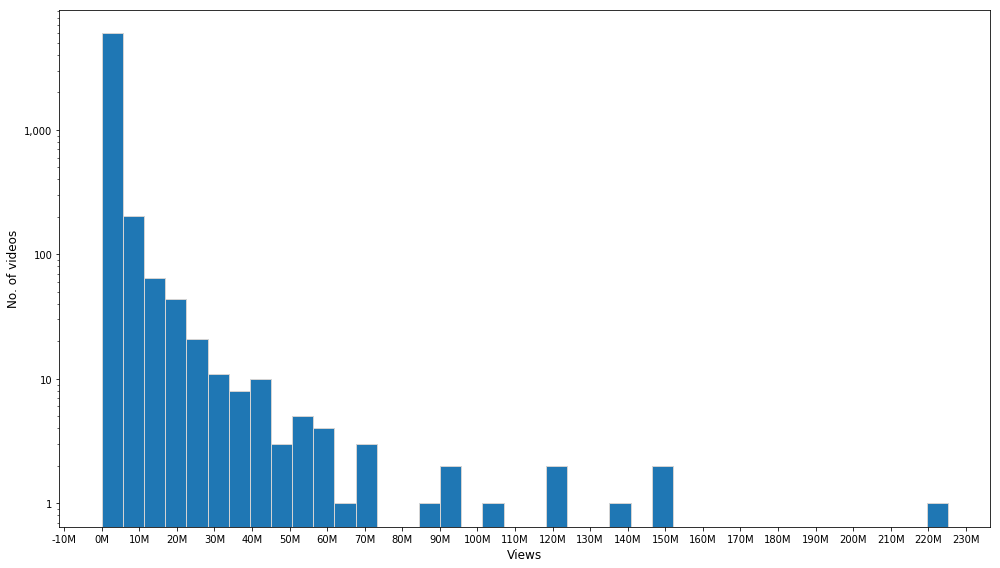

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax = USvideos_Views['views'].plot(kind='hist', figsize=(14,8), bins=40, logy=True, 
                            lw=1, ec='lightgray');
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));
g.set_title("Views Distribuition", fontsize=15)
plt.xlabel("Views", fontsize=12)
plt.ylabel("No. of videos", fontsize=12)
plt.tight_layout()

In [26]:
USvideos_Views[USvideos_Views['views'] < 1e6]['views'].count() / USvideos_Views['views'].count() * 100

65.73767910565266

In [27]:
USvideos_Views[USvideos_Views['views'] < 5e6]['views'].count() / USvideos_Views['views'].count() * 100

92.88301054951977

In [28]:
USvideos_Views[(USvideos_Views['views'] < 5e6) & (USvideos_Views['views'] > 1e6)]['views'].count() / USvideos_Views['views'].count() * 100

27.14533144386711

## Trending videos with most likes

In [29]:
#Trending videos with most likes
USvideos_likes=USvideos.sort_values(by='likes', ascending=False).drop_duplicates(subset=['video_id'])
USvideos_likes.head()

video_id trending_date  \
38273  7C2z4GqqS5E    2018-06-01   
38547  VYOjWnS4cMY    2018-06-02   
34708  ffxKSjUwKdU    2018-05-14   
6181   FlsCjmMhFmw    2017-12-14   
3581   kTlv5_Bs8aw    2017-12-01   

                                                   title        channel_title  \
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
34708               Ariana Grande - No Tears Left To Cry     ArianaGrandeVevo   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
3581   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...              ibighit   

      publish_date  category_id publish_time  \
38273   2018-05-18           10     09:00:02   
38547   2018-05-06           10     04:00:07   
34708   2018-04-20           10     04:00:03   
6181    2017-12-06           24     17:58:51   
3581    2017-11-24           10     09:00:02   

                                                    tags      views    likes  \
38273  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  123010920  5613827   
38547  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  225211923  5023450   
34708  Ariana|"Grande"|"No"|"Tears"|"Left"|"To"|"Cry"...  148689896  3094021   
6181   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  149376127  3093544   
3581           BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"   36857298  2729292   

       ...  comments_disabled  ratings_disabled video_error_or_removed  \
38273  ...              False             False                  False   
38547  ...              False             False                  False   
34708  ...              False             False                  False   
6181   ...              False             False                  False   
3581   ...              False             False                  False   

                                             description  publish_hour  \
38273  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...             9   
38547  “This is America” by Childish Gambino http://s...             4   
34708  No Tears Left To Cry (Official Video)Song Avai...             4   
6181   YouTube Rewind 2017. Celebrating the videos, p...            17   
3581   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...             9   

       category_name  likes_log  views_log dislikes_log  comment_log  
38273          Music  15.540743  18.627784    12.239957    14.021431  
38547          Music  15.429628  19.232552    12.747065    13.156249  
34708          Music  14.944982  18.817373    11.771459    12.396858  
6181   Entertainment  14.944828  18.821978    14.312071    13.605652  
3581           Music  14.819553  17.422564    10.776808    13.210559  

[5 rows x 23 columns]

In [30]:
#Trending videos with least likes
USvideos_likesl=USvideos.sort_values(by='likes', ascending=True).drop_duplicates(subset=['video_id'])
USvideos_likesl.head()

video_id trending_date  \
1490   A_mlvG_nRsg    2017-11-21   
14869  JWAvRIpuj1U    2018-01-29   
1868   _akwfRuL4os    2017-11-23   
23516  _EMxJMU1dCo    2018-03-13   
16303  7Bq_H1ci9ec    2018-02-05   

                                                   title        channel_title  \
1490   Kelly Oubre Punches John Wall in the Lead duri...         Rob Andretti   
14869          Vince McMahon's Major Sports Announcement  Alpha Entertainment   
1868   Highlights of the EA predatory behavior announ...            chris lee   
23516         GET READY WITH ME | Halo Beauty Launch Day                 Tati   
16303                                         The Unsung           MassMutual   

      publish_date  category_id publish_time  \
1490    2017-10-28           17     11:15:14   
14869   2018-01-25           17     20:30:17   
1868    2017-11-21           22     19:29:03   
23516   2018-03-02           26     18:00:04   
16303   2018-01-31           27     20:25:02   

                                                    tags   views  likes  ...  \
1490                                              [none]    2197      0  ...   
14869         Football|"MrMcMahon"|"Vince McMahon"|"XFL"  132093      0  ...   
1868                                              [none]  160012      0  ...   
23516  YouTube|"Beauty"|"Makeup"|"Tutorial"|"Review"|...  928082      0  ...   
16303  i'll stand by you|"mr. adderley"|"boca high lu...   18336      0  ...   

       comments_disabled  ratings_disabled video_error_or_removed  \
1490               False             False                  False   
14869               True              True                  False   
1868               False              True                  False   
23516               True              True                  False   
16303              False              True                  False   

                                             description  publish_hour  \
1490   I'm BACK! \n\n• Will you be apart of the take ...            11   
14869  Stay tuned! Vince McMahon to make a major spor...            20   
1868   The State of Hawaii announces action to addres...            19   
23516  Unfortunately, I had to disable comments due t...            18   
16303  MassMutual was founded on the principle of peo...            20   

          category_name likes_log  views_log dislikes_log  comment_log  
1490              Sport       0.0   7.695303     1.098612     0.000000  
14869             Sport       0.0  11.791269     0.000000     0.000000  
1868   People and Blogs       0.0  11.983010     0.000000     7.451822  
23516  How to and Style       0.0  13.740876     0.000000     0.000000  
16303         Education       0.0   9.816676     0.000000     2.484907  

[5 rows x 23 columns]

## likes distribution

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.]), <a list of 8 Text xticklabel objects>)

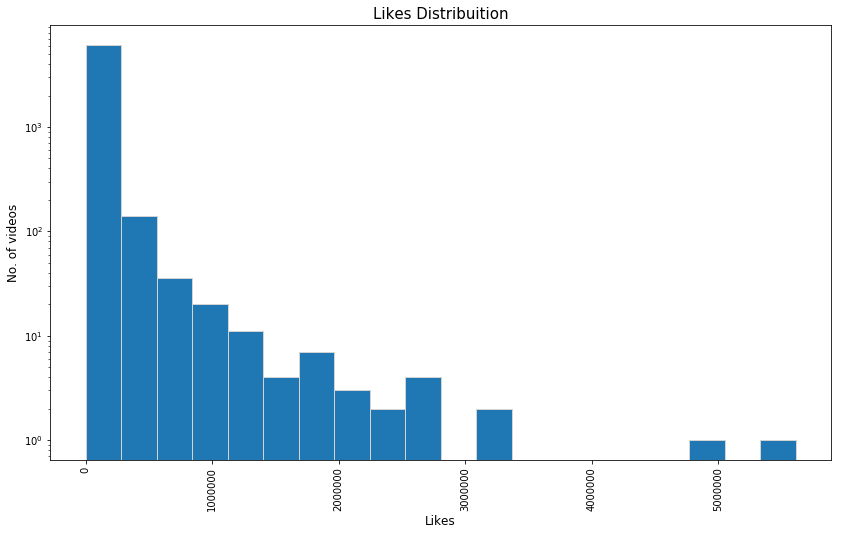

In [31]:
g = USvideos_likes["likes"].plot(kind='hist', figsize=(14,8), bins=20, logy=True, 
                            lw=1, ec='lightgray');
g.set_title("Likes Distribuition", fontsize=15)
plt.xlabel("Likes", fontsize=12)
plt.ylabel("No. of videos", fontsize=12)
plt.xticks(rotation=90)


In [32]:
USvideos_likes[USvideos_likes['likes'] < 2e4]['likes'].count() / USvideos_likes['likes'].count() * 100

61.738308927727914

In [33]:
USvideos_likes[USvideos_likes['likes'] < 5e4]['likes'].count() / USvideos_likes['likes'].count() * 100

79.53078255392852

In [34]:
USvideos_likes[USvideos_likes['likes'] < 3e5]['likes'].count() / USvideos_likes['likes'].count() * 100

96.6461974492206

In [35]:
USvideos_likes[(USvideos_likes['likes'] < 5e4)&(USvideos_likes['likes'] > 1e4)]['likes'].count() / USvideos_likes['likes'].count() * 100

33.270351125806954

## Trending videos with most dislikes

In [36]:
#Trending videos with most dislikes
USvideos_dislikes=USvideos.sort_values(by='dislikes', ascending=False).drop_duplicates(subset=['video_id'])
USvideos_dislikes.head()

video_id trending_date  \
11323  QwZT7T-TXT0    2018-01-09   
6181   FlsCjmMhFmw    2017-12-14   
15571  oWjxSkJpxFU    2018-02-01   
38547  VYOjWnS4cMY    2018-06-02   
17063  _5d-sQ7Fh5M    2018-02-09   

                                                   title        channel_title  \
11323                                          So Sorry.     Logan Paul Vlogs   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
15571                         Suicide: Be Here Tomorrow.     Logan Paul Vlogs   
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
17063                                LOGAN PAUL IS BACK!     Logan Paul Vlogs   

      publish_date  category_id publish_time  \
11323   2018-01-02           24     16:42:21   
6181    2017-12-06           24     17:58:51   
15571   2018-01-24           29     18:30:01   
38547   2018-05-06           10     04:00:07   
17063   2018-02-04           24     22:02:27   

                                                    tags      views    likes  \
11323  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   37539570  1402578   
6181   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  149376127  3093544   
15571  logan paul vlog|"logan paul"|"logan"|"paul"|"l...   24286474  1988746   
38547  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  225211923  5023450   
17063  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   14161833  1216340   

       ...  comments_disabled  ratings_disabled video_error_or_removed  \
11323  ...              False             False                  False   
6181   ...              False             False                  False   
15571  ...              False             False                  False   
38547  ...              False             False                  False   
17063  ...              False             False                  False   

                                             description  publish_hour  \
11323                                                               16   
6181   YouTube Rewind 2017. Celebrating the videos, p...            17   
15571  National Suicide Prevention Lifeline\nCall 1-8...            18   
38547  “This is America” by Childish Gambino http://s...             4   
17063  Do It Different. Be a Maverick ► https://ShopL...            22   

                  category_name  likes_log  views_log dislikes_log  \
11323             Entertainment  14.153823  17.440906    14.330978   
6181              Entertainment  14.944828  18.821978    14.312071   
15571  Non Profits and Activism  14.503015  17.005430    13.118050   
38547                     Music  15.429628  19.232552    12.747065   
17063             Entertainment  14.011358  16.466061    12.584170   

       comment_log  
11323    14.124157  
6181     13.605652  
15571    13.397159  
38547    13.156249  
17063    12.986999  

[5 rows x 23 columns]

## dislikes distribution

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 <a list of 10 Text xticklabel objects>)

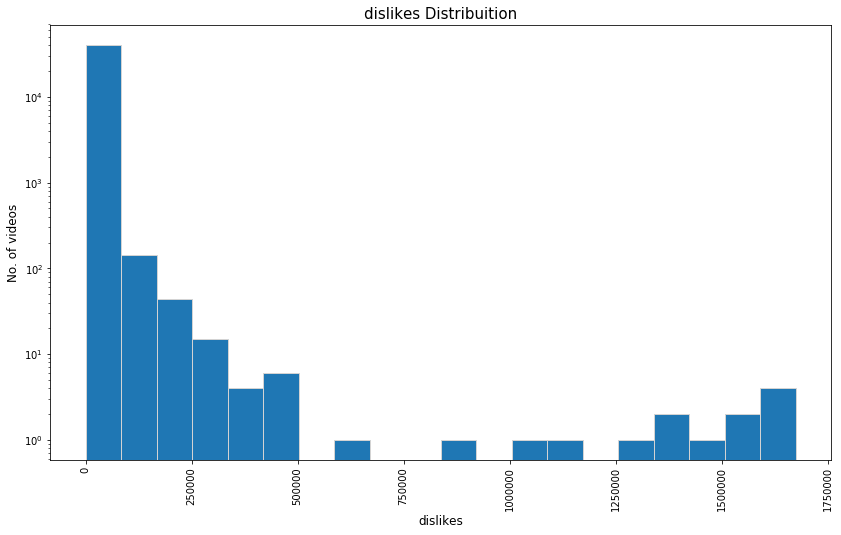

In [37]:
g = USvideos["dislikes"].plot(kind='hist', figsize=(14,8), bins=20, logy=True, 
                            lw=1, ec='lightgray');
g.set_title("dislikes Distribuition", fontsize=15)
plt.xlabel("dislikes", fontsize=12)
plt.ylabel("No. of videos", fontsize=12)
plt.xticks(rotation=90)

## Trending videos with most comment count

In [38]:
#Trending videos with most comment count
USvideos_comment=USvideos.sort_values(by='comment_count', ascending=False).drop_duplicates(subset=['video_id'])
USvideos_comment.head()

video_id trending_date  \
11323  QwZT7T-TXT0    2018-01-09   
38273  7C2z4GqqS5E    2018-06-01   
5020   FlsCjmMhFmw    2017-12-09   
15571  oWjxSkJpxFU    2018-02-01   
3581   kTlv5_Bs8aw    2017-12-01   

                                                   title      channel_title  \
11323                                          So Sorry.   Logan Paul Vlogs   
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV            ibighit   
5020   YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
15571                         Suicide: Be Here Tomorrow.   Logan Paul Vlogs   
3581   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...            ibighit   

      publish_date  category_id publish_time  \
11323   2018-01-02           24     16:42:21   
38273   2018-05-18           10     09:00:02   
5020    2017-12-06           24     17:58:51   
15571   2018-01-24           29     18:30:01   
3581    2017-11-24           10     09:00:02   

                                                    tags      views    likes  \
11323  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   37539570  1402578   
38273  BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"|"FAK...  123010920  5613827   
5020   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   75969469  2251797   
15571  logan paul vlog|"logan paul"|"logan"|"paul"|"l...   24286474  1988746   
3581           BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"   36857298  2729292   

       ...  comments_disabled  ratings_disabled video_error_or_removed  \
11323  ...              False             False                  False   
38273  ...              False             False                  False   
5020   ...              False             False                  False   
15571  ...              False             False                  False   
3581   ...              False             False                  False   

                                             description  publish_hour  \
11323                                                               16   
38273  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...             9   
5020   YouTube Rewind 2017. Celebrating the videos, p...            17   
15571  National Suicide Prevention Lifeline\nCall 1-8...            18   
3581   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...             9   

                  category_name  likes_log  views_log dislikes_log  \
11323             Entertainment  14.153823  17.440906    14.330978   
38273                     Music  15.540743  18.627784    12.239957   
5020              Entertainment  14.627240  18.145842    13.935779   
15571  Non Profits and Activism  14.503015  17.005430    13.118050   
3581                      Music  14.819553  17.422564    10.776808   

       comment_log  
11323    14.124157  
38273    14.021431  
5020     13.626474  
15571    13.397159  
3581     13.210559  

[5 rows x 23 columns]

In [39]:
#Trending videos with least comment count
USvideos_commentl=USvideos.sort_values(by='comment_count', ascending=True).drop_duplicates(subset=['video_id'])
USvideos_commentl.head()

video_id trending_date  \
31474  lAaSh9DogM8    2018-04-28   
20022  3BHcVPSD4p0    2018-02-24   
2362   avDL9JRcmgs    2017-11-25   
5385   e77J4g0LMOk    2017-12-10   
35241  pojXEFDFMw8    2018-05-17   

                                                   title    channel_title  \
31474                                    GENDER REVEAL!!    Nikki Glamour   
20022  WATCH LIVE: Florida Gov. Rick Scott announcing...     PBS NewsHour   
2362   DipClip | Chicken Nugget Rally Testing | How s...   Milkmen Design   
5385   Little Mix bring the Power & CNCO to The X Fac...  The X Factor UK   
35241                 2018 FIFA World Cup | Forget | ITV              ITV   

      publish_date  category_id publish_time  \
31474   2018-04-19           24     23:52:14   
20022   2018-02-23           25     17:17:29   
2362    2017-11-13           22     14:39:03   
5385    2017-12-03           24     19:47:01   
35241   2018-05-11           24     11:00:09   

                                                    tags    views   likes  \
31474  Baby Gender Reveal|"Gender Reveal"|"Pregnancy ...   247327   24450   
20022                                             [none]    10182     137   
2362   Mcdonalds|"Wendys"|"Burger king"|"hardees"|"kf...     4985       6   
5385   the x factor|"x factor"|"X factor UK"|"x facto...  5275288  169795   
35241  tv|"television"|"ITV"|"Britain"|"British"|"UK"...   270010    3626   

       ...  comments_disabled  ratings_disabled video_error_or_removed  \
31474  ...               True             False                  False   
20022  ...               True             False                  False   
2362   ...              False             False                  False   
5385   ...               True             False                  False   
35241  ...               True             False                  False   

                                             description  publish_hour  \
31474  What will our baby #Glamazon be??!\n*Special T...            23   
20022                                                               17   
2362   The DipClip is designed to securely hold your ...            14   
5385   Visit the official site: http://itv.com/xfacto...            19   
35241  Join us this summer for the FIFA World Cup 201...            11   

          category_name  likes_log  views_log dislikes_log  comment_log  
31474     Entertainment  10.104426  12.418471     5.934894          0.0  
20022   News & Politics   4.927254   9.228475     4.248495          0.0  
2362   People and Blogs   1.945910   8.514389     0.000000          0.0  
5385      Entertainment  12.042353  15.478544     8.217978          0.0  
35241     Entertainment   8.196161  12.506218     6.003887          0.0  

[5 rows x 23 columns]

## comments distribution

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text xticklabel objects>)

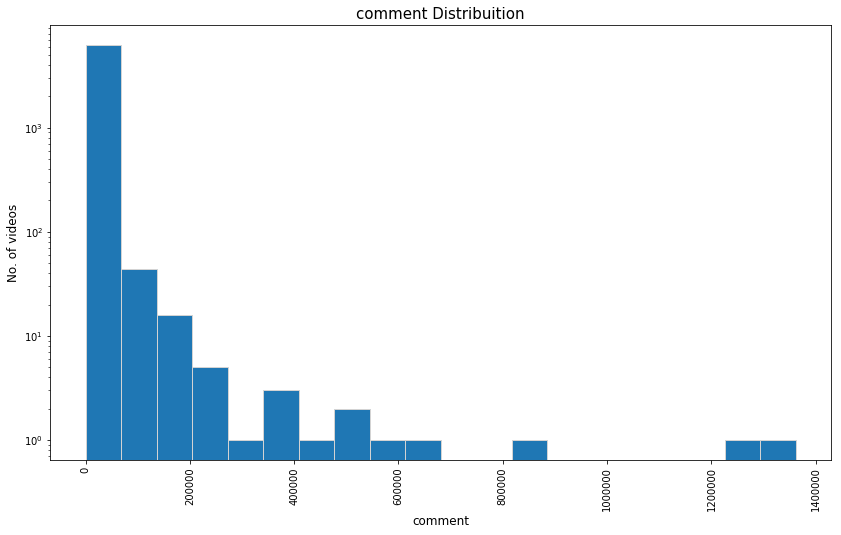

In [40]:
g = USvideos_comment["comment_count"].plot(kind='hist', figsize=(14,8), bins=20, logy=True, 
                            lw=1, ec='lightgray');
g.set_title("comment Distribuition", fontsize=15)
plt.xlabel("comment", fontsize=12)
plt.ylabel("No. of videos", fontsize=12)
plt.xticks(rotation=90)

In [41]:
USvideos_comment[USvideos_comment['comment_count'] < 20000]['comment_count'].count() / USvideos_comment['comment_count'].count() * 100

94.03243583687609

In [42]:
USvideos_comment[USvideos_comment['comment_count'] < 100000]['comment_count'].count() / USvideos_comment['comment_count'].count() * 100

99.2757046134467

In [43]:
USvideos_comment[(USvideos_comment['comment_count'] < 1e4)&(USvideos_comment['comment_count'] >4000)]['comment_count'].count() / USvideos_comment['comment_count'].count() * 100

13.91906786332861

## Observation:

## duplicate trending video

In [44]:
#we will create a separate datasets in which we will get rid of repetitions
USvideos_last = USvideos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
USvideos_first = USvideos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

In [45]:
USvideos_first.describe()

category_id         views         likes       dislikes  comment_count  \
count  6351.000000  6.351000e+03  6.351000e+03    6351.000000    6351.000000   
mean     20.444182  7.582096e+05  3.449357e+04    1427.222012    4501.707290   
std       7.213046  1.928993e+06  1.162439e+05   12078.814524   21460.223331   
min       1.000000  5.490000e+02  0.000000e+00       0.000000       0.000000   
25%      17.000000  8.351100e+04  1.908000e+03      72.000000     261.000000   
50%      24.000000  2.709020e+05  7.987000e+03     242.000000     921.000000   
75%      25.000000  7.512665e+05  2.516300e+04     763.000000    2845.000000   
max      43.000000  4.843165e+07  3.880071e+06  629120.000000  733373.000000   

       publish_hour    likes_log    views_log  dislikes_log  comment_log  
count   6351.000000  6351.000000  6351.000000   6351.000000  6351.000000  
mean      13.520863     8.677071    12.333343      5.392288     6.601479  
std        6.493522     2.244343     1.723859      1.925743     2.140672  
min        0.000000     0.000000     6.309918      0.000000     0.000000  
25%        9.000000     7.554334    11.332746      4.290459     5.568345  
50%       15.000000     8.985696    12.509516      5.493061     6.826545  
75%       18.000000    10.133170    13.529517      6.638568     7.953670  
max       23.000000    15.171364    17.695664     13.352079    13.505411

## time to trend

In [46]:
#we will create new feature representing the time (in days) between publication and the day when it became trending.
USvideos_first[['trending_date','publish_date']] = USvideos_first[['trending_date','publish_date']].apply(pd.to_datetime)
USvideos_first['time_to_trend'] = (USvideos_first['trending_date'] - USvideos_first['publish_date']).dt.days
USvideos_first.head(2)

C:\anaconda\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

  publish_date  category_id publish_time  \
0   2017-11-13           22     17:13:01   
1   2017-11-13           24     07:30:00   

                                                tags    views  likes  ...  \
0                                    SHANtell martin   748374  57527  ...   
1  last week tonight trump presidency|"last week ...  2418783  97185  ...   

   ratings_disabled  video_error_or_removed  \
0             False                   False   
1             False                   False   

                                         description  publish_hour  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...            17   
1  One year after the presidential election, John...             7   

      category_name  likes_log  views_log  dislikes_log comment_log  \
0  People and Blogs  10.960027  13.525659      7.995307    9.677528   
1     Entertainment  11.484382  14.698775      8.723719    9.449672   

   time_to_trend  
0              1  
1              1  

[2 rows x 24 columns]

In [47]:
USvideos_first.describe()

category_id         views         likes       dislikes  comment_count  \
count  6351.000000  6.351000e+03  6.351000e+03    6351.000000    6351.000000   
mean     20.444182  7.582096e+05  3.449357e+04    1427.222012    4501.707290   
std       7.213046  1.928993e+06  1.162439e+05   12078.814524   21460.223331   
min       1.000000  5.490000e+02  0.000000e+00       0.000000       0.000000   
25%      17.000000  8.351100e+04  1.908000e+03      72.000000     261.000000   
50%      24.000000  2.709020e+05  7.987000e+03     242.000000     921.000000   
75%      25.000000  7.512665e+05  2.516300e+04     763.000000    2845.000000   
max      43.000000  4.843165e+07  3.880071e+06  629120.000000  733373.000000   

       publish_hour    likes_log    views_log  dislikes_log  comment_log  \
count   6351.000000  6351.000000  6351.000000   6351.000000  6351.000000   
mean      13.520863     8.677071    12.333343      5.392288     6.601479   
std        6.493522     2.244343     1.723859      1.925743     2.140672   
min        0.000000     0.000000     6.309918      0.000000     0.000000   
25%        9.000000     7.554334    11.332746      4.290459     5.568345   
50%       15.000000     8.985696    12.509516      5.493061     6.826545   
75%       18.000000    10.133170    13.529517      6.638568     7.953670   
max       23.000000    15.171364    17.695664     13.352079    13.505411   

       time_to_trend  
count    6351.000000  
mean       22.520548  
std       209.963344  
min         0.000000  
25%         1.000000  
50%         2.000000  
75%         3.000000  
max      4215.000000

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text xticklabel objects>)

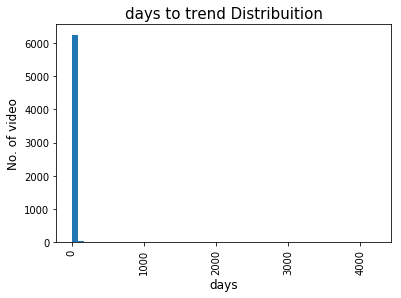

In [48]:
fig, ax = plt.subplots()
g= sns.distplot(USvideos_first["time_to_trend"], kde=False, rug=False,
                 hist_kws={'alpha': 1}, ax=ax)
g.set_title("days to trend Distribuition", fontsize=15)
g.set_xlabel("days", fontsize=12)
g.set_ylabel("No. of video", fontsize=12)
plt.xticks(rotation=90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

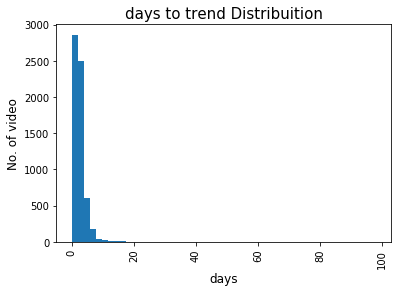

In [49]:
fig, ax = plt.subplots()
g= sns.distplot(USvideos_first[USvideos_first["time_to_trend"] < 100]["time_to_trend"], kde=False, rug=False,
                 hist_kws={'alpha': 1}, ax=ax)
g.set_title("days to trend Distribuition", fontsize=15)
g.set_xlabel("days", fontsize=12)
g.set_ylabel("No. of video", fontsize=12)
plt.xticks(rotation=90)

In [50]:
USvideos_first[USvideos_first["time_to_trend"] < 10]["time_to_trend"].count() / USvideos_first["time_to_trend"].count() * 100

97.37049283577389

In [51]:
USvideos_first[USvideos_first["time_to_trend"] < 5]["time_to_trend"].count() / USvideos_first["time_to_trend"].count() * 100

90.11179341835931

In [52]:
USvideos_first[USvideos_first["time_to_trend"] >= 10]["time_to_trend"].count() / USvideos_first["time_to_trend"].count() * 100

2.629507164226106

## trendeng video for more than 5 days

Text(0, 0.5, 'video')

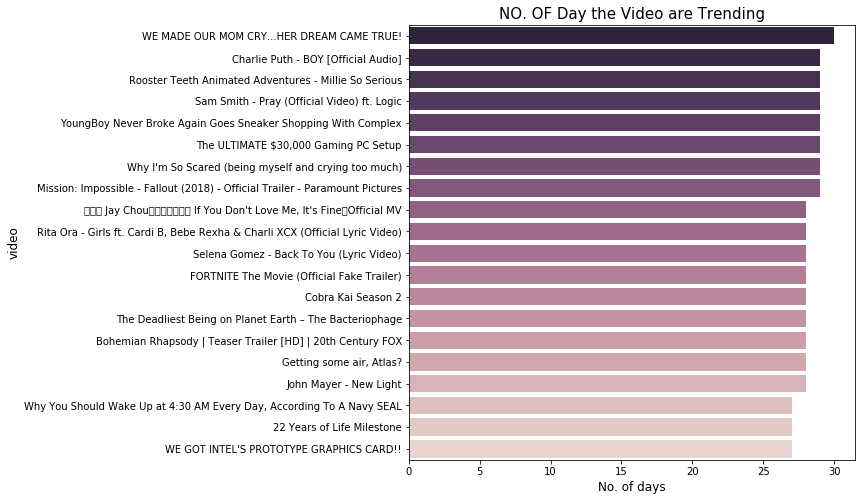

In [53]:
Trendeng_video=USvideos.groupby("title").size().reset_index(name="trending_days") \
    .sort_values("trending_days", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x="trending_days", y="title", data=Trendeng_video,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("NO. OF Day the Video are Trending", fontsize=15)
g.set_xlabel("No. of days", fontsize=12)
g.set_ylabel("video", fontsize=12)

In [54]:
Trendeng_video.head()

title  trending_days
5845         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!             30
1081                Charlie Puth - BOY [Official Audio]             29
4498  Rooster Teeth Animated Adventures - Millie So ...             29
4629        Sam Smith - Pray (Official Video) ft. Logic             29
6300  YoungBoy Never Broke Again Goes Sneaker Shoppi...             29

In [55]:
Trendeng_video[Trendeng_video["trending_days"]>14]["title"].count()

20

In [56]:
Trendeng_video[Trendeng_video["trending_days"]==29]["title"].count()

7

## views of  a video when it first appearing on the trending list

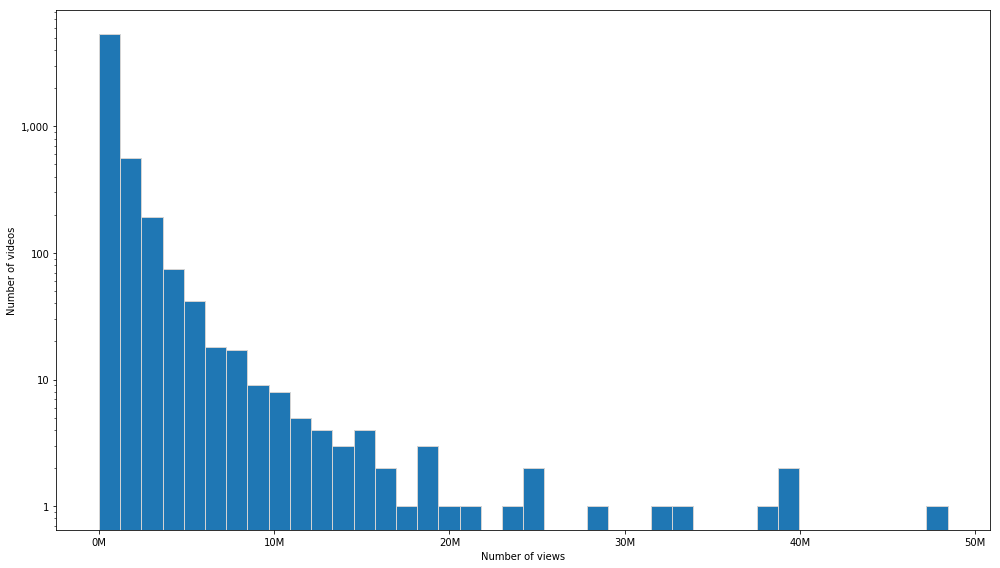

In [57]:
ax = USvideos_first['views'].plot(kind='hist', figsize=(14,8), bins=40, logy=True, 
                            lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.tight_layout()

In [58]:
'{:,.0f}'.format(USvideos_first['views'].quantile(q=0.9))

'1,685,423'

In [59]:
'{:,.0f}'.format(USvideos_first['views'].quantile(q=0.95))

'2,801,378'

In [60]:
USvideos_first['views'].describe().apply(lambda x: format(x, 'f'))

count        6351.000000
mean       758209.564478
std       1928993.099630
min           549.000000
25%         83511.000000
50%        270902.000000
75%        751266.500000
max      48431654.000000
Name: views, dtype: object

## likes of  a video when it first appearing on the trending list

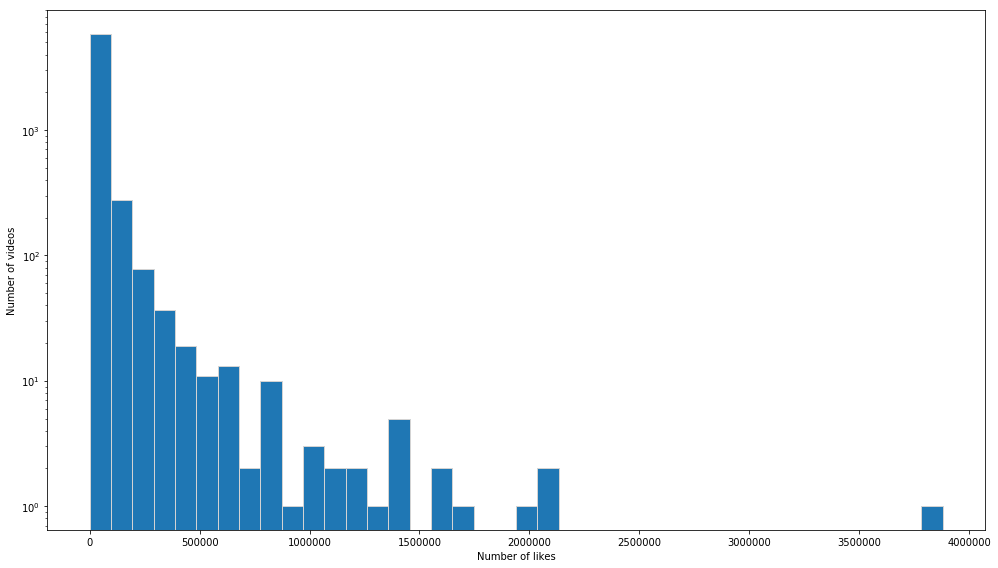

In [61]:
ax = USvideos_first['likes'].plot(kind='hist', figsize=(14,8), bins=40, logy=True, 
                            lw=1, ec='lightgray')
plt.xlabel('Number of likes')
plt.ylabel('Number of videos')
plt.tight_layout()

In [62]:
'{:,.0f}'.format(USvideos_first['likes'].quantile(q=0.60))

'12,471'

In [63]:
'{:,.0f}'.format(USvideos_first['likes'].quantile(q=0.9))

'73,765'

In [64]:
'{:,.0f}'.format(USvideos_first['likes'].quantile(q=0.95))

'132,308'

In [65]:
USvideos_first['likes'].describe().apply(lambda x: format(x, 'f'))

count       6351.000000
mean       34493.569832
std       116243.869030
min            0.000000
25%         1908.000000
50%         7987.000000
75%        25163.000000
max      3880071.000000
Name: likes, dtype: object

## comments of  a video when it first appearing on the trending list

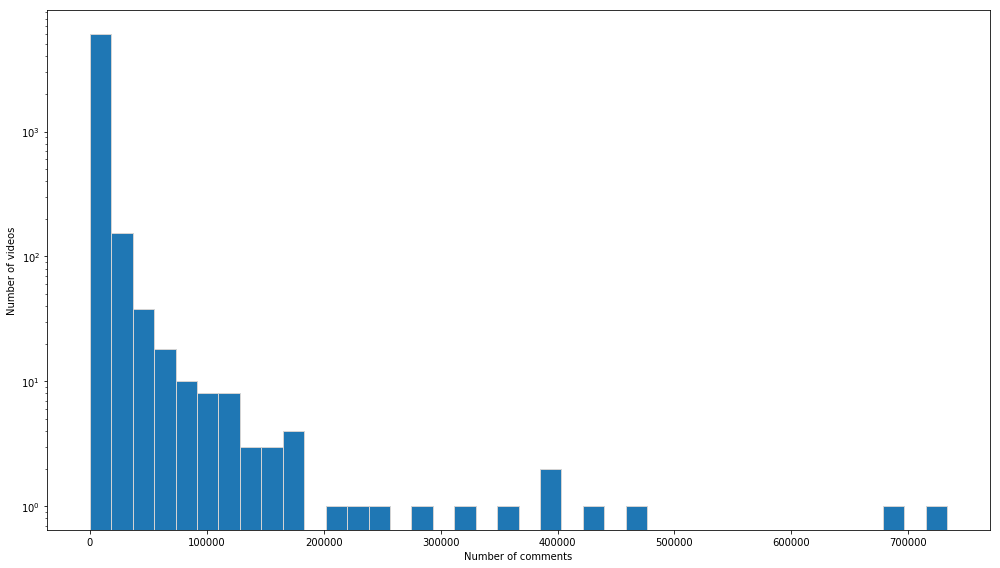

In [66]:
ax = USvideos_first['comment_count'].plot(kind='hist', figsize=(14,8), bins=40, logy=True, 
                            lw=1, ec='lightgray')
plt.xlabel('Number of comments')
plt.ylabel('Number of videos')
plt.tight_layout()

In [67]:
'{:,.0f}'.format(USvideos_first['comment_count'].quantile(q=0.60))

'1,389'

In [68]:
'{:,.0f}'.format(USvideos_first['comment_count'].quantile(q=0.90))

'8,311'

In [110]:
'{:,.0f}'.format(USvideos_first['comment_count'].quantile(q=0.95))

'15,760'

In [111]:
USvideos_first['comment_count'].describe().apply(lambda x: format(x, 'f'))

count      6351.000000
mean       4501.707290
std       21460.223331
min           0.000000
25%         261.000000
50%         921.000000
75%        2845.000000
max      733373.000000
Name: comment_count, dtype: object

## Observation:

## channels with the largest number of trending videos

Text(0, 0.5, 'Channel')

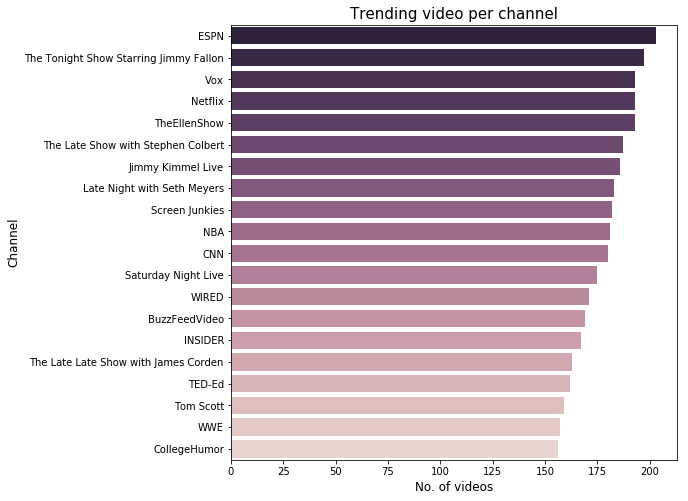

In [71]:
Trendeng_channel=USvideos.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x="video_count", y="channel_title", data=Trendeng_channel,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("Trending video per channel", fontsize=15)
g.set_xlabel("No. of videos", fontsize=12)
g.set_ylabel("Channel", fontsize=12)

In [72]:
USvideos['channel_title'].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       193
TheEllenShow                              193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
First We Feast                            153
HellthyJunkFood                   

## video category with the largest number of trending videos

Text(0, 0.5, 'Category')

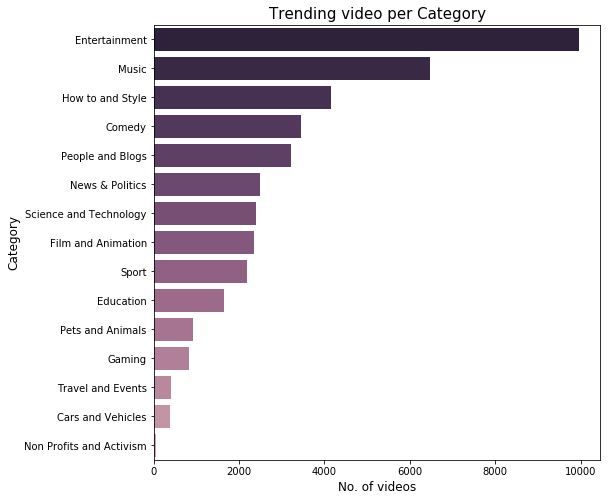

In [73]:
Trendeng_Category=USvideos.groupby("category_name").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x="video_count", y="category_name", data=Trendeng_Category,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("Trending video per Category", fontsize=15)
g.set_xlabel("No. of videos", fontsize=12)
g.set_ylabel("Category", fontsize=12)

In [74]:
USvideos['category_name'].value_counts()

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64

## Trending videos and their publishing time

Text(0, 0.5, 'No. of videos')

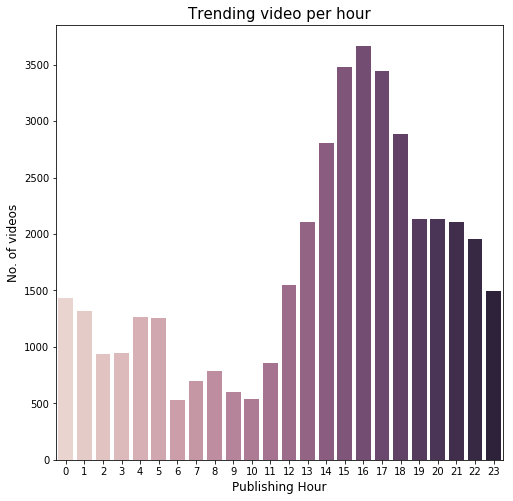

In [75]:
Trending_hour= USvideos["publish_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publish_hour", "publish_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x="publish_hour", y="No_of_videos", data=Trending_hour, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
g.set_title("Trending video per hour", fontsize=15)
g.set_xlabel("Publishing Hour", fontsize=12)
g.set_ylabel("No. of videos", fontsize=12)

In [76]:
USvideos['publish_hour'].value_counts()

16    3669
15    3483
17    3447
18    2889
14    2807
20    2136
19    2132
13    2105
21    2104
22    1959
12    1551
23    1495
0     1436
1     1318
4     1262
5     1253
3      944
2      936
11     856
8      790
7      700
9      605
10     541
6      531
Name: publish_hour, dtype: int64

## Observation:

## like-dislike rate per category

Text(0, 0.5, 'category')

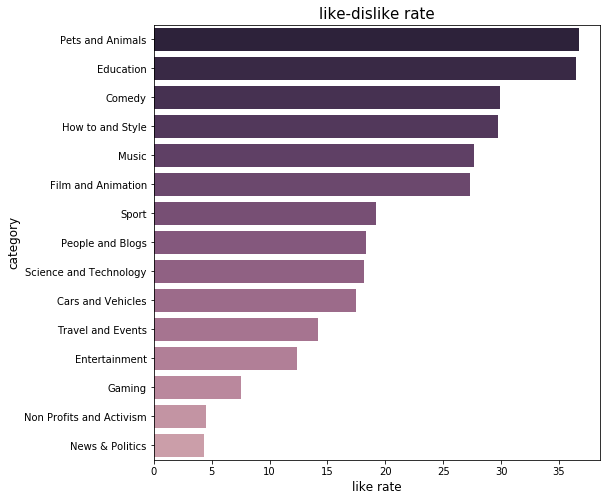

In [77]:
Trendeng_like_rate=USvideos.groupby("category_name")['likes'].agg('sum') / USvideos.groupby('category_name')['dislikes'].agg('sum')
Trendeng_like_rate=Trendeng_like_rate.sort_values(ascending=False).reset_index().head(20)
Trendeng_like_rate.columns = ['category','Trendeng_like_rate']

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x='Trendeng_like_rate', y="category", data=Trendeng_like_rate,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("like-dislike rate", fontsize=15)
g.set_xlabel("like rate", fontsize=12)
g.set_ylabel("category", fontsize=12)


## like rate per category

Text(0, 0.5, 'category')

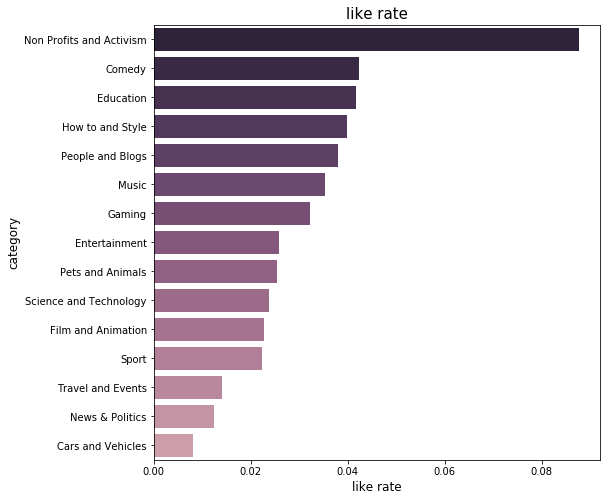

In [78]:
Trendeng_like_rate=USvideos.groupby("category_name")['likes'].agg('sum') / USvideos.groupby('category_name')['views'].agg('sum')
Trendeng_like_rate=Trendeng_like_rate.sort_values(ascending=False).reset_index().head(20)
Trendeng_like_rate.columns = ['category','Trendeng_like_rate']

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x='Trendeng_like_rate', y="category", data=Trendeng_like_rate,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("like rate", fontsize=15)
g.set_xlabel("like rate", fontsize=12)
g.set_ylabel("category", fontsize=12)


## dislike rate per category

Text(0, 0.5, 'category')

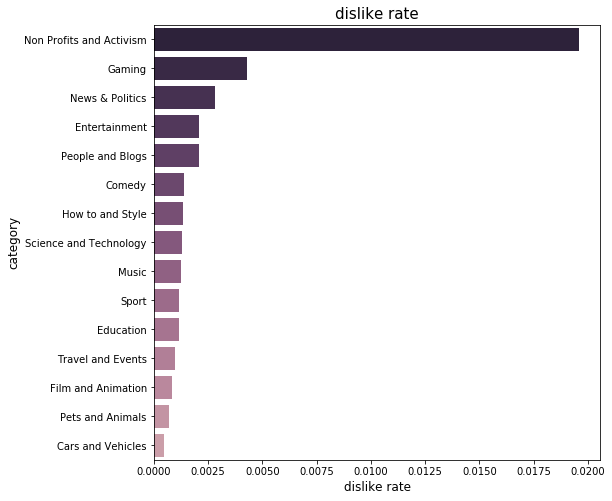

In [79]:
Trendeng_like_rate=USvideos.groupby("category_name")['dislikes'].agg('sum') / USvideos.groupby('category_name')['views'].agg('sum')
Trendeng_like_rate=Trendeng_like_rate.sort_values(ascending=False).reset_index().head(20)
Trendeng_like_rate.columns = ['category','Trendeng_like_rate']

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x='Trendeng_like_rate', y="category", data=Trendeng_like_rate,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("dislike rate", fontsize=15)
g.set_xlabel("dislike rate", fontsize=12)
g.set_ylabel("category", fontsize=12)


## comment-view rate per category

Text(0, 0.5, 'category')

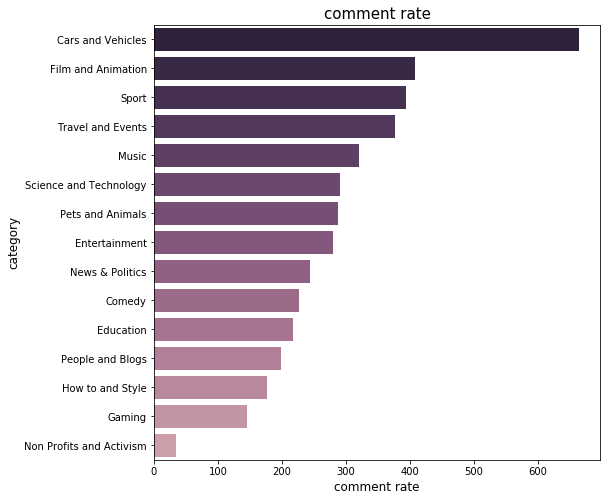

In [80]:
Trendeng_like_rate=USvideos.groupby("category_name")['views'].agg('sum') / USvideos.groupby('category_name')['comment_count'].agg('sum')
Trendeng_like_rate=Trendeng_like_rate.sort_values(ascending=False).reset_index().head(20)
Trendeng_like_rate.columns = ['category','Trendeng_like_rate']

fig, ax = plt.subplots(figsize=(8,8))
g= sns.barplot(x='Trendeng_like_rate', y="category", data=Trendeng_like_rate,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
g.set_title("comment rate", fontsize=15)
g.set_xlabel("comment rate", fontsize=12)
g.set_ylabel("category", fontsize=12)


## trending video titles contain capitalized word

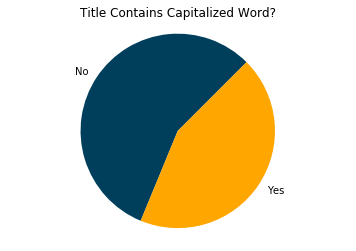

In [81]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


USvideos["contains_capitalized"] = USvideos["title"].apply(contains_capitalized_word)
USvideos_dup=USvideos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)

value_counts =USvideos_dup["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
g = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
g = ax.axis('equal')
g= ax.set_title('Title Contains Capitalized Word?')

In [82]:
# percentage of capital word
USvideos_dup["contains_capitalized"].value_counts(normalize=True)*100

False    56.274602
True     43.725398
Name: contains_capitalized, dtype: float64

In [83]:
# percentage of title with capital words
USvideos['title'].apply(str.isupper).sum() / USvideos.shape[0] * 100

6.354245524921244

## Video title lengths

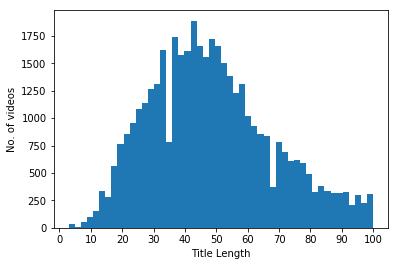

In [84]:
# distribution of title length
USvideos["title_length"] = USvideos["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
g = sns.distplot(USvideos["title_length"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
g= ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

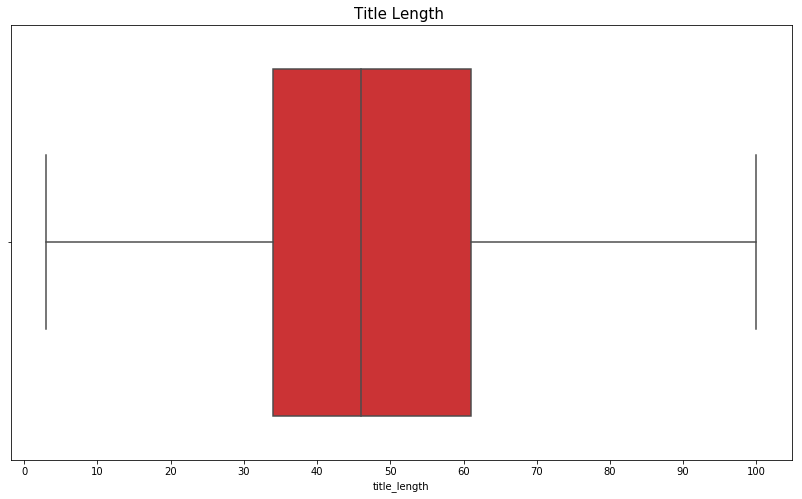

In [85]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.boxplot('title_length', data=USvideos, palette="Set1", ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
g.set_title("Title Length ", fontsize=15)
plt.show()

In [86]:
# statistics of title length
USvideos['title_length'].describe()

count    40949.000000
mean        48.578183
std         19.619025
min          3.000000
25%         34.000000
50%         46.000000
75%         61.000000
max        100.000000
Name: title_length, dtype: float64

In [87]:
# min title length
USvideos[USvideos['title_length']==3]

video_id trending_date title       channel_title publish_date  \
36556  SQsPvrev_bQ    2018-05-24   435  Tyler, The Creator   2018-05-22   
36764  SQsPvrev_bQ    2018-05-25   435  Tyler, The Creator   2018-05-22   
36984  SQsPvrev_bQ    2018-05-26   435  Tyler, The Creator   2018-05-22   
37202  SQsPvrev_bQ    2018-05-27   435  Tyler, The Creator   2018-05-22   
37412  SQsPvrev_bQ    2018-05-28   435  Tyler, The Creator   2018-05-22   
37614  SQsPvrev_bQ    2018-05-29   435  Tyler, The Creator   2018-05-22   
37821  SQsPvrev_bQ    2018-05-30   435  Tyler, The Creator   2018-05-22   
38033  SQsPvrev_bQ    2018-05-31   435  Tyler, The Creator   2018-05-22   
38237  SQsPvrev_bQ    2018-06-01   435  Tyler, The Creator   2018-05-22   
38447  SQsPvrev_bQ    2018-06-02   435  Tyler, The Creator   2018-05-22   
38656  SQsPvrev_bQ    2018-06-03   435  Tyler, The Creator   2018-05-22   
38864  SQsPvrev_bQ    2018-06-04   435  Tyler, The Creator   2018-05-22   
39070  SQsPvrev_bQ    2018-06-05   435  Tyler, The Creator   2018-05-22   
39279  SQsPvrev_bQ    2018-06-06   435  Tyler, The Creator   2018-05-22   
39484  SQsPvrev_bQ    2018-06-07   435  Tyler, The Creator   2018-05-22   
39688  SQsPvrev_bQ    2018-06-08   435  Tyler, The Creator   2018-05-22   
39896  SQsPvrev_bQ    2018-06-09   435  Tyler, The Creator   2018-05-22   
40106  SQsPvrev_bQ    2018-06-10   435  Tyler, The Creator   2018-05-22   
40307  SQsPvrev_bQ    2018-06-11   435  Tyler, The Creator   2018-05-22   
40521  SQsPvrev_bQ    2018-06-12   435  Tyler, The Creator   2018-05-22   
40721  SQsPvrev_bQ    2018-06-13   435  Tyler, The Creator   2018-05-22   
40926  SQsPvrev_bQ    2018-06-14   435  Tyler, The Creator   2018-05-22   

       category_id publish_time  \
36556           27     15:20:56   
36764           27     15:20:56   
36984           27     15:20:56   
37202           27     15:20:56   
37412           27     15:20:56   
37614           27     15:20:56   
37821           27     15:20:56   
38033           27     15:20:56   
38237           27     15:20:56   
38447           27     15:20:56   
38656           27     15:20:56   
38864           27     15:20:56   
39070           27     15:20:56   
39279           27     15:20:56   
39484           27     15:20:56   
39688           27     15:20:56   
39896           27     15:20:56   
40106           27     15:20:56   
40307           27     15:20:56   
40521           27     15:20:56   
40721           27     15:20:56   
40926           27     15:20:56   

                                                    tags    views   likes  \
36556  tyler the creator|"435"|"nice toenails"|"golf ...   937541   91201   
36764  tyler the creator|"435"|"nice toenails"|"golf ...  1228380  104909   
36984  tyler the creator|"435"|"nice toenails"|"golf ...  1369722  110218   
37202  tyler the creator|"435"|"nice toenails"|"golf ...  1449615  113334   
37412  tyler the creator|"435"|"nice toenails"|"golf ...  1529740  116006   
37614  tyler the creator|"435"|"nice toenails"|"golf ...  1618890  118684   
37821  tyler the creator|"435"|"nice toenails"|"golf ...  1690379  120450   
38033  tyler the creator|"435"|"nice toenails"|"golf ...  1777564  122405   
38237  tyler the creator|"435"|"nice toenails"|"golf ...  1811343  122991   
38447  tyler the creator|"435"|"nice toenails"|"golf ...  1859577  123928   
38656  tyler the creator|"435"|"nice toenails"|"golf ...  1909104  124857   
38864  tyler the creator|"435"|"nice toenails"|"golf ...  1951430  125622   
39070  tyler the creator|"435"|"nice toenails"|"golf ...  1988638  126142   
39279  tyler the creator|"435"|"nice toenails"|"golf ...  2035356  126806   
39484  tyler the creator|"435"|"nice toenails"|"golf ...  2063734  127133   
39688  tyler the creator|"435"|"nice toenails"|"golf ...  2094409  127595   
39896  tyler the creator|"435"|"nice toenails"|"golf ...  2127937  128258   
40106  tyler the creator|"435"|"nice toenails"|"golf ...  2168881  128910   
40307  tyler th

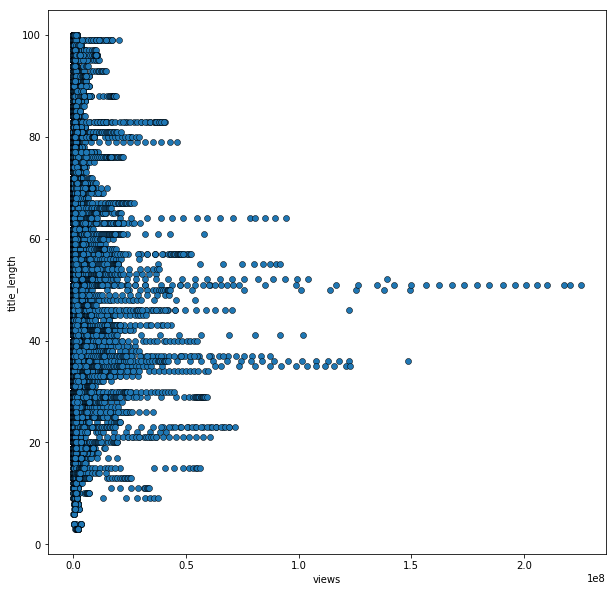

In [88]:
# relationship between title length and number of views
fig, ax = plt.subplots(figsize=(10,10))
g = plt.scatter(x=USvideos['views'], y=USvideos['title_length'], edgecolors="#000000", linewidths=0.5)
g= ax.set(xlabel="views", ylabel="title_length")

## Observation:

## Correlations of Trending Videos

In [89]:
corr_columns = ['views', 'likes', 'dislikes', 'comment_count','title_length','publish_hour']
corr_matrix = USvideos[corr_columns].corr()
corr_matrix

views     likes  dislikes  comment_count  title_length  \
views          1.000000  0.849177  0.472213       0.617621     -0.035612   
likes          0.849177  1.000000  0.447186       0.803057     -0.078166   
dislikes       0.472213  0.447186  1.000000       0.700184     -0.031235   
comment_count  0.617621  0.803057  0.700184       1.000000     -0.067043   
title_length  -0.035612 -0.078166 -0.031235      -0.067043      1.000000   
publish_hour  -0.064916 -0.045296 -0.009750      -0.017421     -0.063199   

               publish_hour  
views             -0.064916  
likes             -0.045296  
dislikes          -0.009750  
comment_count     -0.017421  
title_length      -0.063199  
publish_hour       1.000000

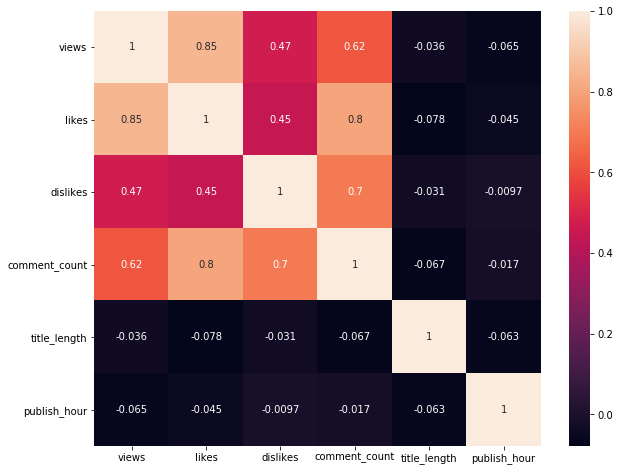

In [90]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Relationship between the number of views and the number of likes

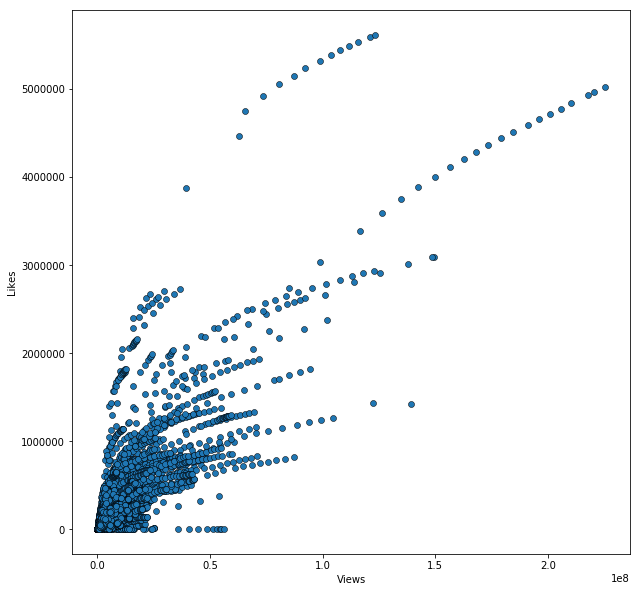

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
g = plt.scatter(x=USvideos['views'], y=USvideos['likes'], edgecolors="#000000", linewidths=0.5)
g= ax.set(xlabel="Views", ylabel="Likes")

## Relationship between the number of views and the number of comments

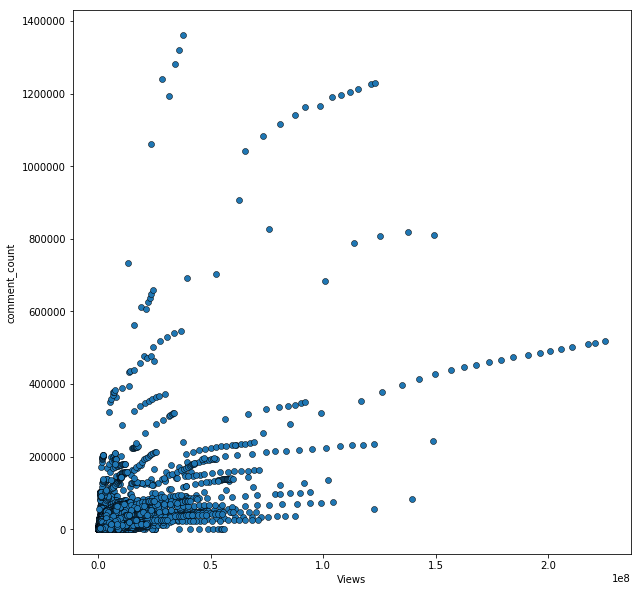

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
g = plt.scatter(x=USvideos['views'], y=USvideos['comment_count'], edgecolors="#000000", linewidths=0.5)
g= ax.set(xlabel="Views", ylabel="comment_count")

## Relationship between the number of comments and the number of likes

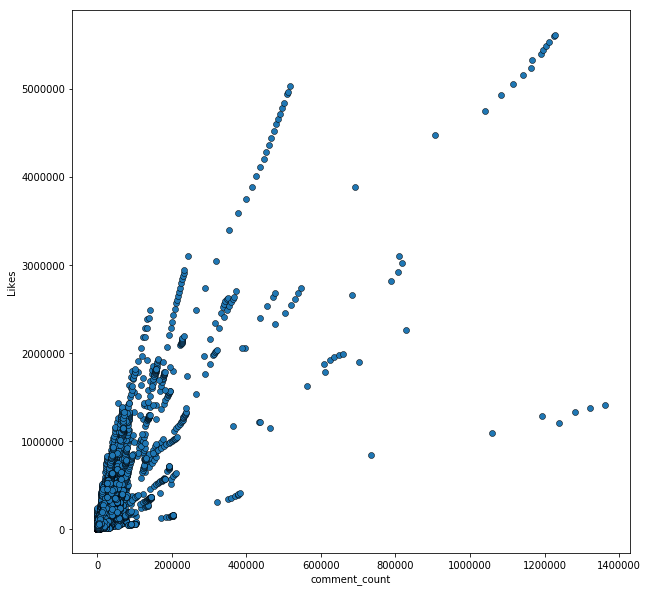

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
g = plt.scatter(x=USvideos['comment_count'], y=USvideos['likes'], edgecolors="#000000", linewidths=0.5)
g= ax.set(xlabel="comment_count", ylabel="Likes")

## Relationship between the number of comments and the number of dislikes

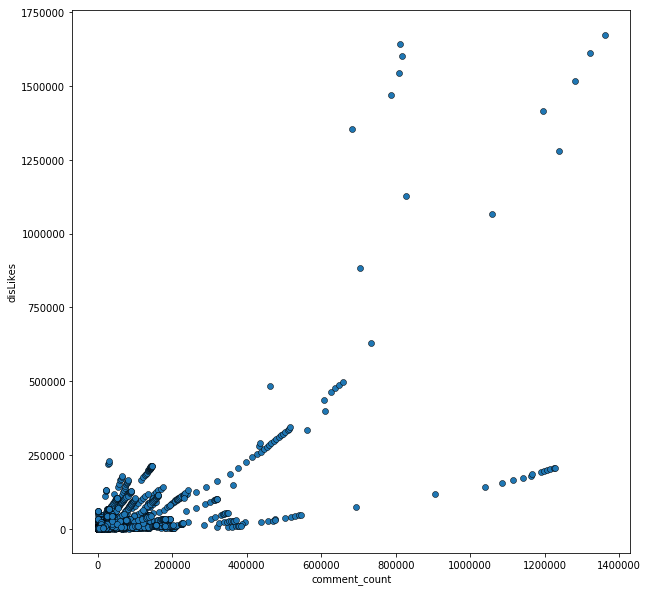

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
g = plt.scatter(x=USvideos['comment_count'], y=USvideos['dislikes'], edgecolors="#000000", linewidths=0.5)
g= ax.set(xlabel="comment_count", ylabel="disLikes")

## Observation:

## Most common words in video titles

In [95]:
title_words = list(USvideos["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(30)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773)]

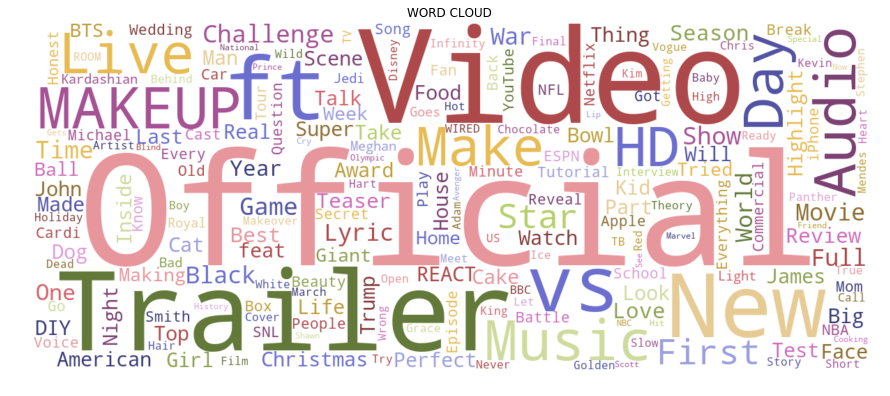

In [96]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## Most common words in video tags

In [97]:
tag_words = list(USvideos["tags"].apply(lambda x: x.split()))
tag_words = [x for y in tag_words for x in y]
Counter(tag_words).most_common(30)

[('the', 7800),
 ('to', 6878),
 ('and', 6189),
 ('of', 6008),
 ('a', 4347),
 ('in', 3068),
 ('with', 2304),
 ('on', 2173),
 ('vs', 2089),
 ('for', 1913),
 ('my', 1720),
 ('The', 1575),
 ('[none]', 1535),
 ('is', 1442),
 ('&', 1438),
 ('new', 1399),
 ('makeup', 1351),
 ('make', 1264),
 ('you', 1227),
 ('it', 1183),
 ('Late', 1098),
 ('your', 1026),
 ('music', 1022),
 ('perfect', 903),
 ('life', 867),
 ('i', 853),
 ('youtube"|"youtube', 833),
 ('me', 831),
 ('voice', 819),
 ('-', 796)]

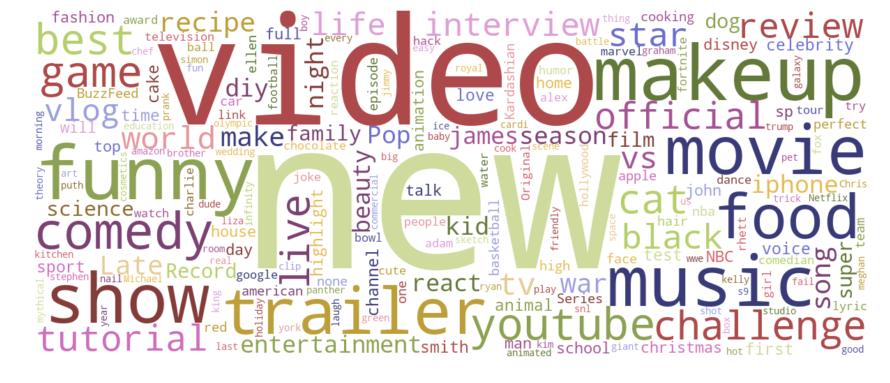

In [98]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(tag_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
g = plt.axis("off")

## Observation:

## sentements analysis

## Sentiment analysis on Video's tags

In [99]:
from wordcloud import WordCloud
import nltk
#nltk.download()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\مروة\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\مروة\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\مروة\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [100]:
category_list = USvideos['category_name'].unique()
category_list

array(['People and Blogs', 'Entertainment', 'Comedy',
       'Science and Technology', 'Film and Animation', 'News & Politics',
       'Sport', 'Music', 'Pets and Animals', 'Education',
       'How to and Style', 'Cars and Vehicles', 'Travel and Events',
       'Gaming', 'Non Profits and Activism', nan], dtype=object)

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

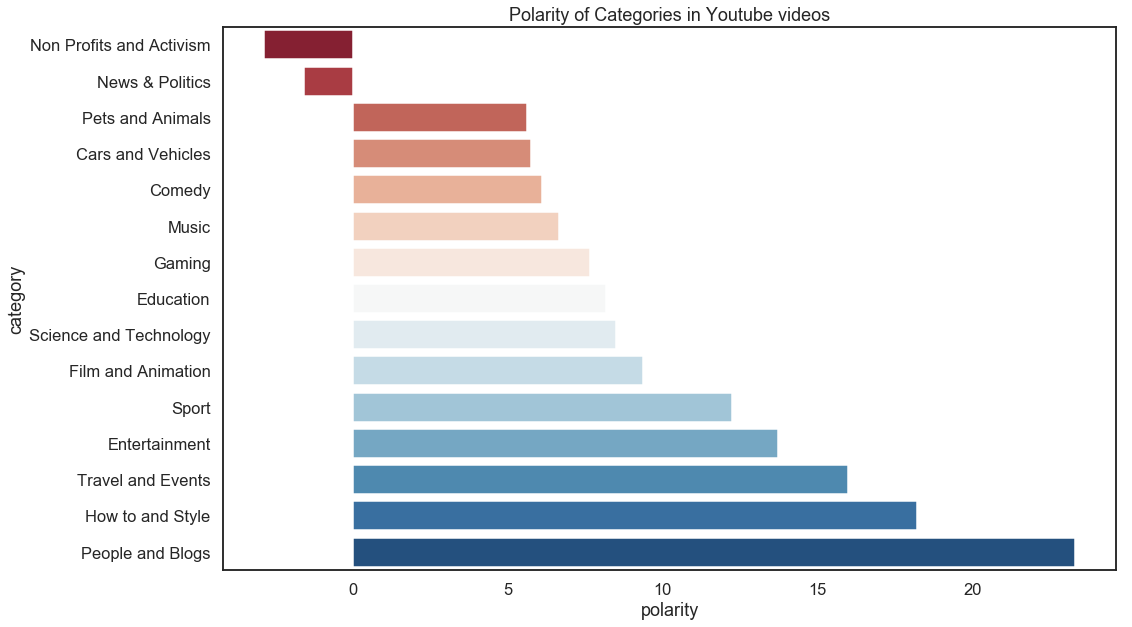

In [101]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))

polarities = list()

for cate in category_list:
    tags_word = USvideos[USvideos['category_name']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("polarity")
plt.ylabel("category")
plt.title("Polarity of Categories in Youtube videos")

##  common words in tags in the most negative and most positive category

## Non Profits and Activism

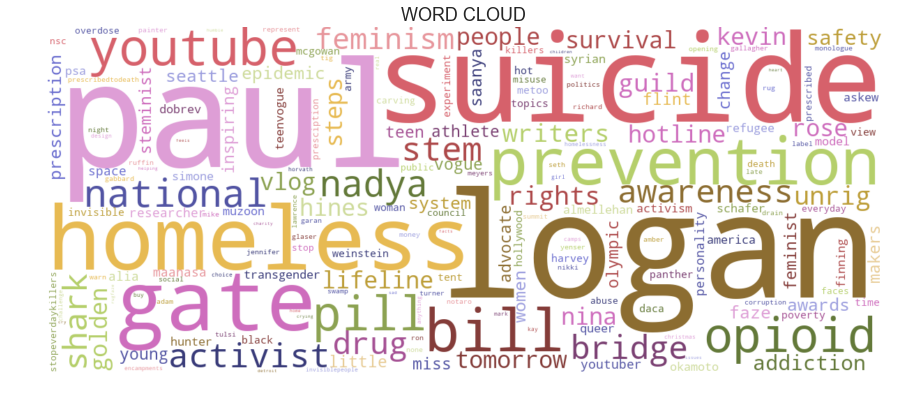

In [102]:
tags_word = USvideos[USvideos['category_name']=='Non Profits and Activism']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## News & Politics

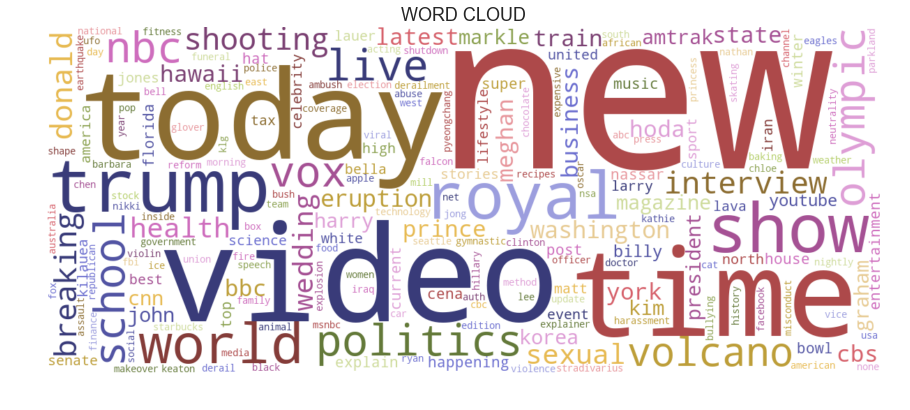

In [103]:
tags_word = USvideos[USvideos['category_name']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## People & Blogs

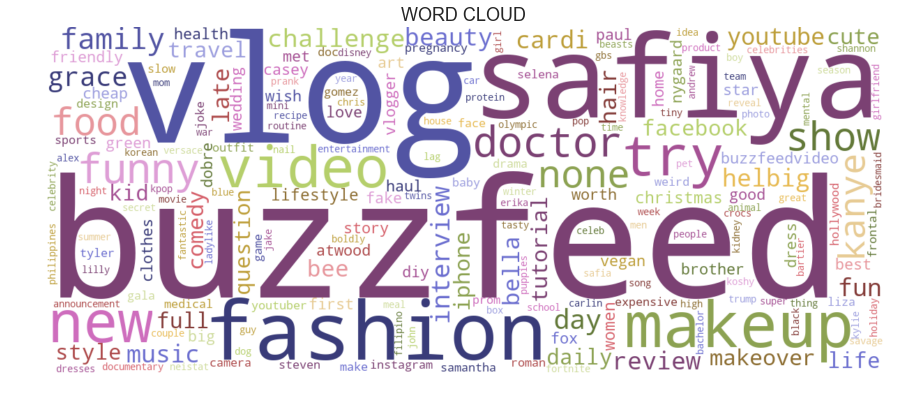

In [104]:
tags_word = USvideos[USvideos['category_name']=='People and Blogs']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## Sentiment analysis on Video's ttitles

In [105]:
category_list = USvideos['category_name'].unique()
category_list

array(['People and Blogs', 'Entertainment', 'Comedy',
       'Science and Technology', 'Film and Animation', 'News & Politics',
       'Sport', 'Music', 'Pets and Animals', 'Education',
       'How to and Style', 'Cars and Vehicles', 'Travel and Events',
       'Gaming', 'Non Profits and Activism', nan], dtype=object)

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

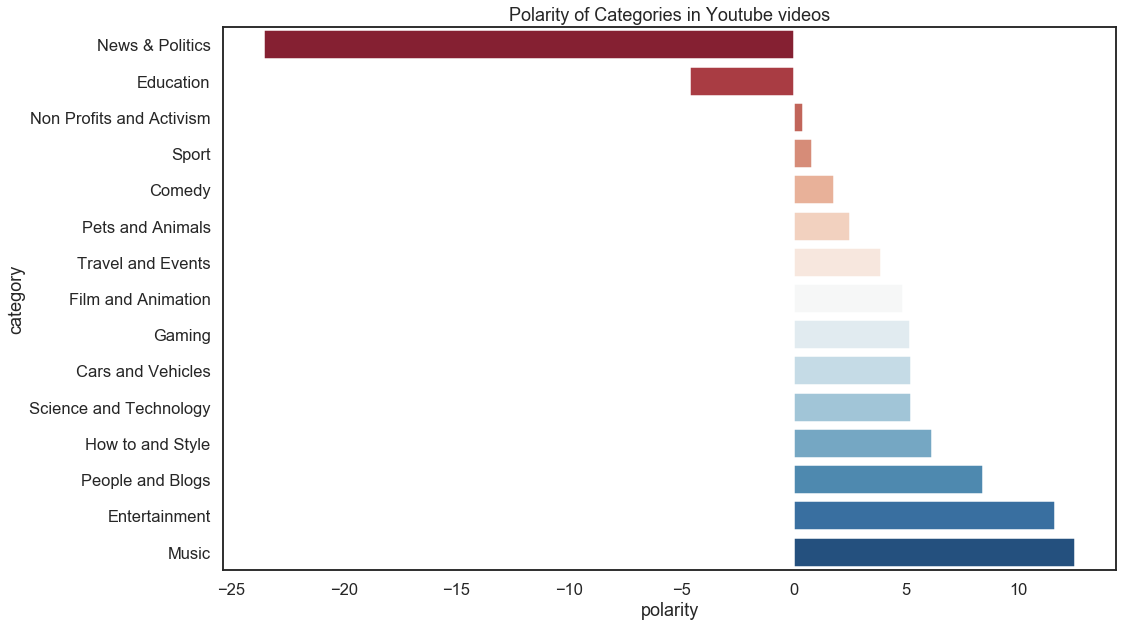

In [106]:
MAX_N = 10000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))

polarities = list()

for cate in category_list:
    tags_word = USvideos_first[USvideos_first['category_name']==cate]['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("polarity")
plt.ylabel("category")
plt.title("Polarity of Categories in Youtube videos")

##  common words in titles in the most negative and most positive category

## News & Politics

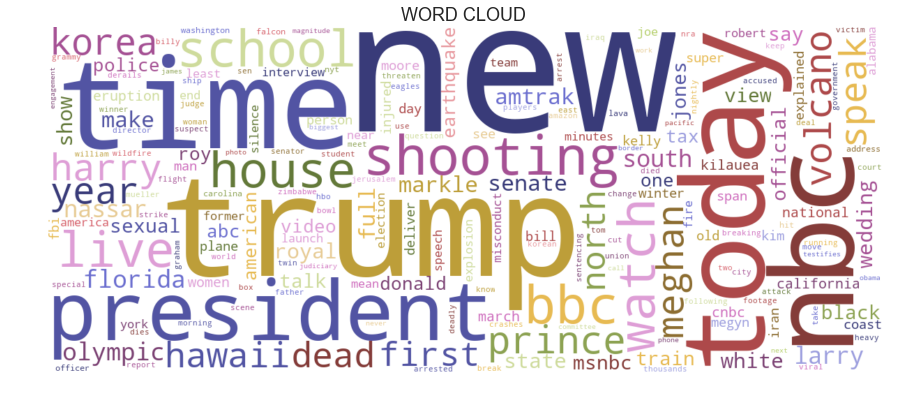

In [107]:
tags_word = USvideos_first[USvideos_first['category_name']=='News & Politics']['title'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## Education

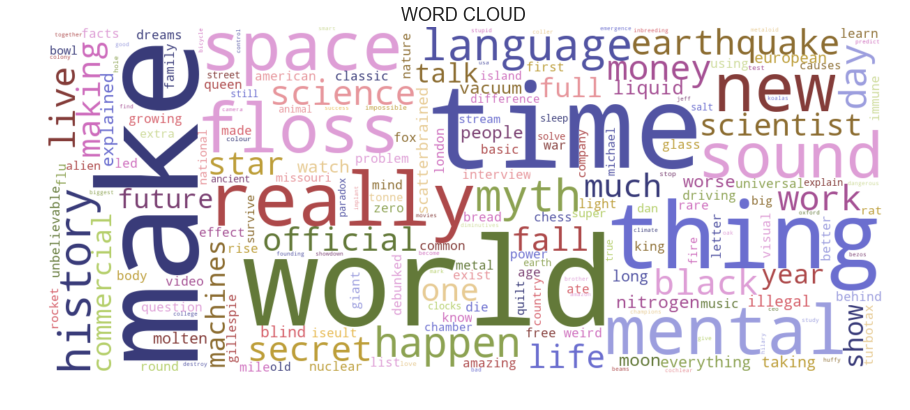

In [108]:
tags_word = USvideos_first[USvideos_first['category_name']=='Education']['title'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## music

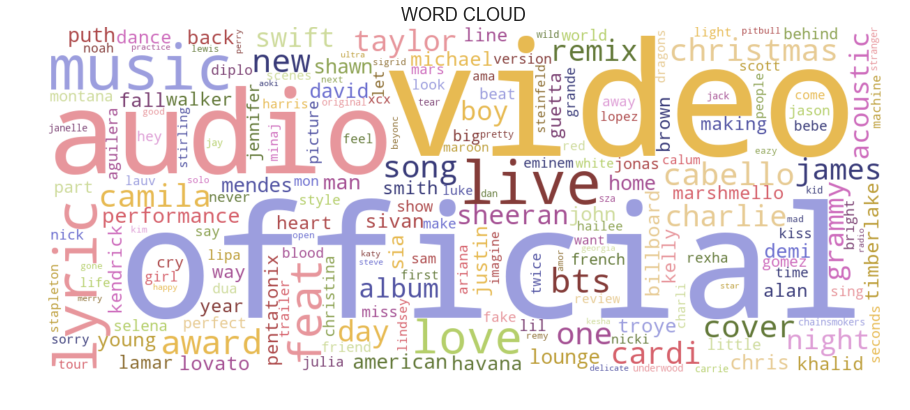

In [109]:
tags_word = USvideos_first[USvideos_first['category_name']=='Music']['title'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(cleaned_data_title))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WORD CLOUD ")
g = plt.axis("off")

## Observation: